# Task 1: Analyse the data using the visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame or equivalent data structure.
df= pd.read_csv('Zoo.csv')

# First few rows of dataset
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
# Get number of rows and columns

print("\nNumber of rows and columns:")
df.shape


Number of rows and columns:


(101, 18)

In [3]:
# Get more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


#### Visualizations on raw dataset

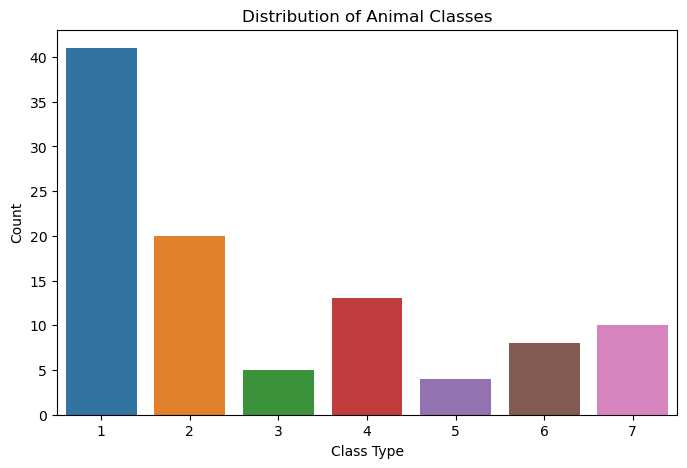

In [4]:
# Distribution of Classes


plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Classes')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

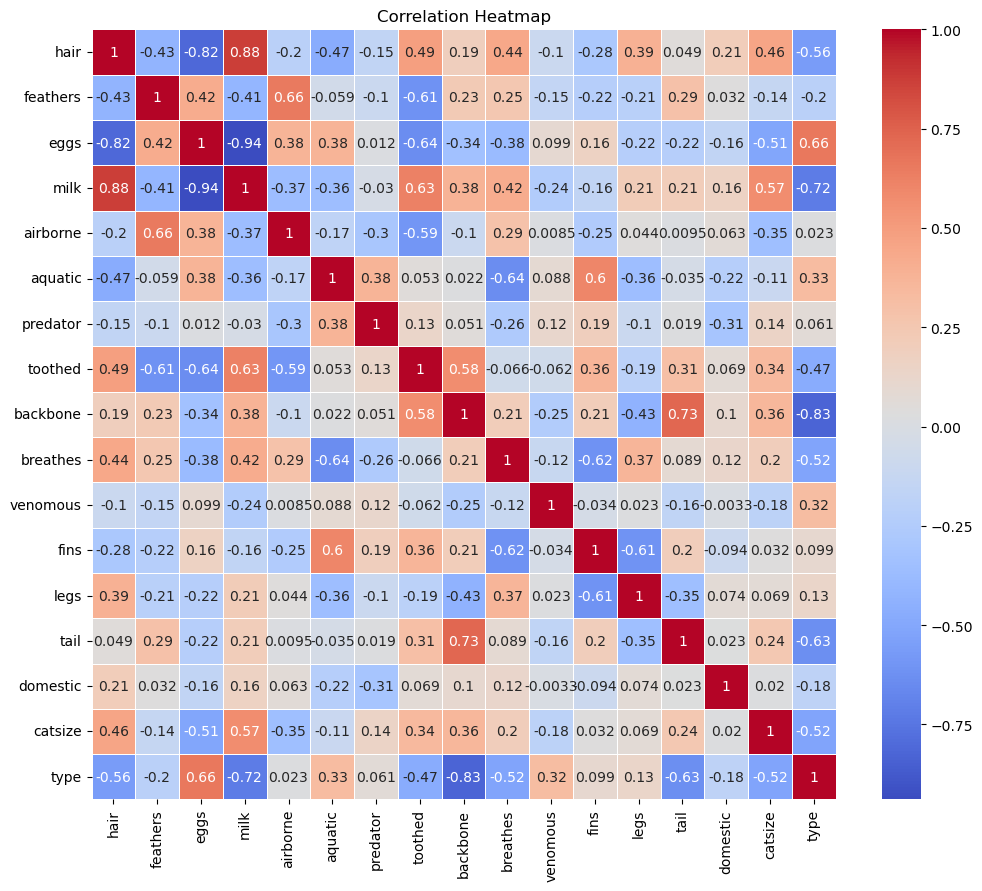

In [7]:
# Correlation heatmap for numeric columns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

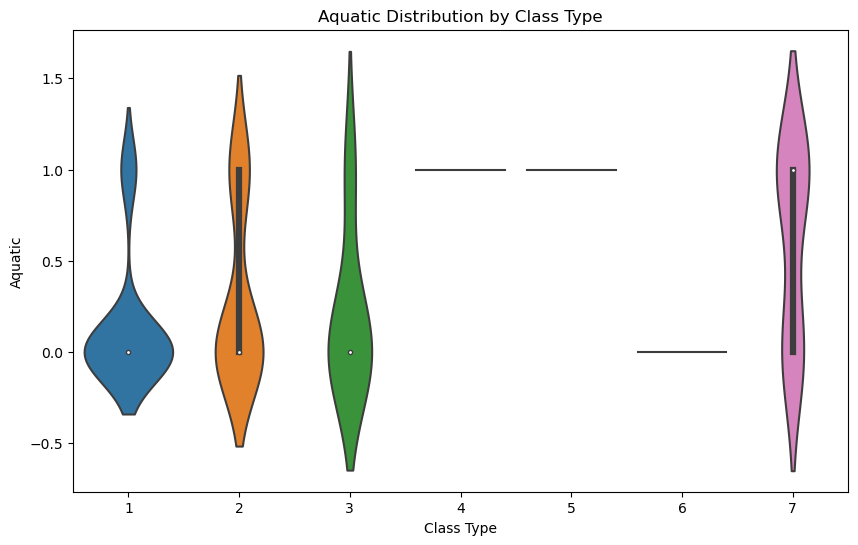

In [8]:
# Violin plot of 'aquatic' attribute by 'class_type'

plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='aquatic', data=df)
plt.title('Aquatic Distribution by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Aquatic')
plt.show()

# Task 2: Preprocess the data by handling missing values & Outliers, if any.

In [9]:
# Check null values
total = df.isnull().sum().sort_values(ascending=False)
print("Null Values: ")
print(total)

Null Values: 
animal name    0
hair           0
catsize        0
domestic       0
tail           0
legs           0
fins           0
venomous       0
breathes       0
backbone       0
toothed        0
predator       0
aquatic        0
airborne       0
milk           0
eggs           0
feathers       0
type           0
dtype: int64


We can see that there are no null values in this dataset.

In [10]:
# Check for outliers using z-score

# Calculate Z-scores for all numeric columns
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Define threshold for identifying outliers
threshold = 3

# Find rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)

# Print rows containing outliers
print("Rows with outliers:")
df[outlier_rows]

Rows with outliers:


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7
86,stingray,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6


In [11]:
# Clean the dataset and remove outliers
df = df[~outlier_rows]
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Task 3: Split the dataset into training and testing sets (80% training, 20% testing).

In [12]:
# Separate features and target variable
X = df.drop(['animal name', 'type'], axis=1)  # Features
y = df['type']  # Target variable

In [13]:
# Split dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (74, 16)
Shape of X_test: (19, 16)
Shape of y_train: (74,)
Shape of y_test: (19,)


# Task 4: Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [14]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [15]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [17]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8947368421052632


# Task 5: Choose an appropriate distance metric and value for K.

In [18]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # values for K
    'metric': ['euclidean', 'manhattan', 'hamming']  # Distance metrics
}

In [19]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [20]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'hamming'],
                         'n_neighbors': [3, 5, 7, 9]})

In [21]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best Score: 0.9466666666666667


# Task 6: Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [22]:
# Best Model Evaluation

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: {:.2f}".format(test_accuracy))

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

Accuracy on Test Set: 0.95


In [23]:
# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.9079
Recall: 0.9474
F1-score: 0.9248


# Task 7: Visualize the decision boundaries of the classifier.

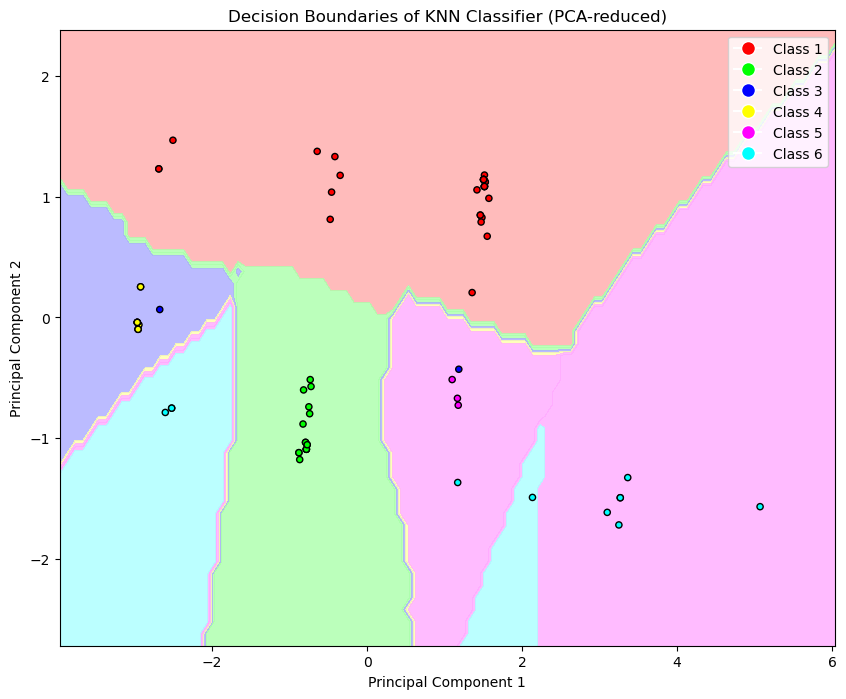

In [24]:
# Assume X_train, X_test, y_train, y_test are properly defined
# Perform PCA with 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Initialize KNN classifier with chosen parameters
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_pca, y_train)

# Create meshgrid for decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict classes for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF', '#AAFFFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF'])

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

# Plot training points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries of KNN Classifier (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Manually create legend handles and labels
classes = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
legend_handles = []
for class_index, class_name in enumerate(classes):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_bold(class_index), 
                          markersize=10, label=class_name))

# Add legend
plt.legend(handles=legend_handles, loc="best")

plt.show()